In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [5]:

df = pd.read_csv('data/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
print('Non-Fraud: ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% ')
print('Fraud: ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% ')

Non-Fraud:  99.83 % 
Fraud:  0.17 % 


Text(0.5, 1.0, 'Count of Fraud and Non-Fraud Transactions \n (0: Non-Fraud, 1: Fraud)')

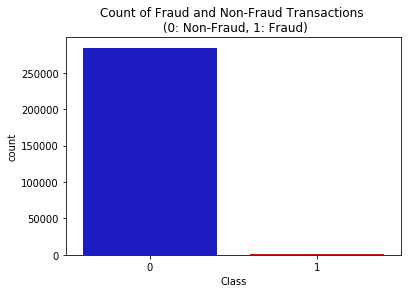

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Count of Fraud and Non-Fraud Transactions \n (0: Non-Fraud, 1: Fraud)', fontsize=12)

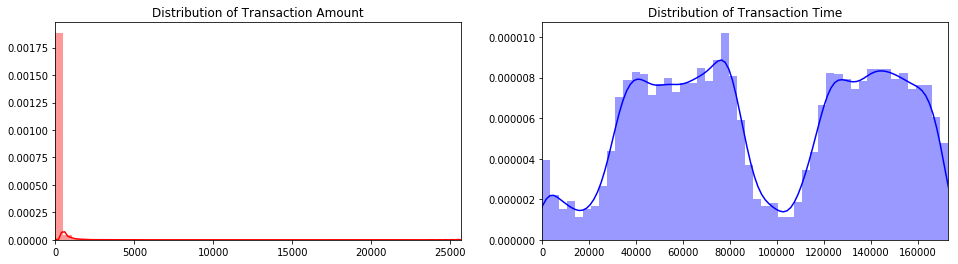

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

amount = df['Amount'].values
time = df['Time'].values

sns.distplot(amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=12)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=12)
ax[1].set_xlim([min(time), max(time)])



plt.show()

In [11]:
# Since the other columns have already been scaled, the Amount and Time columns should be scaled as well. 
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()

df['scaledAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaledTime'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
scaledAmount = df['scaledAmount']
scaledTime = df['scaledTime']

df.drop(['scaledAmount', 'scaledTime'], axis=1, inplace=True)
df.insert(0, 'scaledAmount', scaledAmount)
df.insert(1, 'scaledTime', scaledTime)


df.head()

,scaledAmount,scaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
# make the count of classes equal to have a  normal dist.
df = df.sample(frac=1)

# Count of fraud transactions: 492
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_dist_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle rows
subsample_df = normal_dist_df.sample(frac=1, random_state=42)

subsample_df.head()

,scaledAmount,scaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
147966,0.891078,0.053055,-0.726598,1.468475,-0.106260,-0.039695,1.050332,-1.271123,1.647632,-0.351766,...,0.313180,0.160606,0.433820,-0.508378,-0.214924,1.057746,0.100914,0.036122,0.122009,0
154719,-0.307413,0.211222,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,...,0.098132,1.189423,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886,1
64212,0.957312,-0.394918,1.245064,-0.760073,0.550449,-0.584398,-1.298357,-0.948358,-0.563079,-0.186756,...,0.231233,0.153468,0.169300,-0.052838,0.387050,0.329664,-0.290472,-0.000013,0.035148,0
42549,0.925452,-0.511578,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1
95597,18.615944,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1


Distribution of the Fraud and Non-Fraud classes in the subsample data
1    0.5
0    0.5
Name: Class, dtype: float64


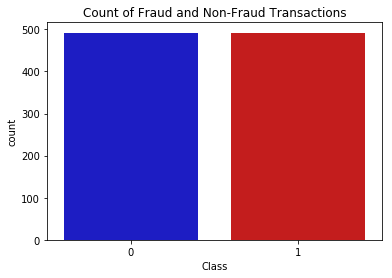

In [14]:
print('Distribution of the Fraud and Non-Fraud classes in the subsample data')
print(subsample_df['Class'].value_counts()/len(subsample_df))



sns.countplot('Class', data=subsample_df, palette=colors)
plt.title('Count of Fraud and Non-Fraud Transactions', fontsize=12)
plt.show()

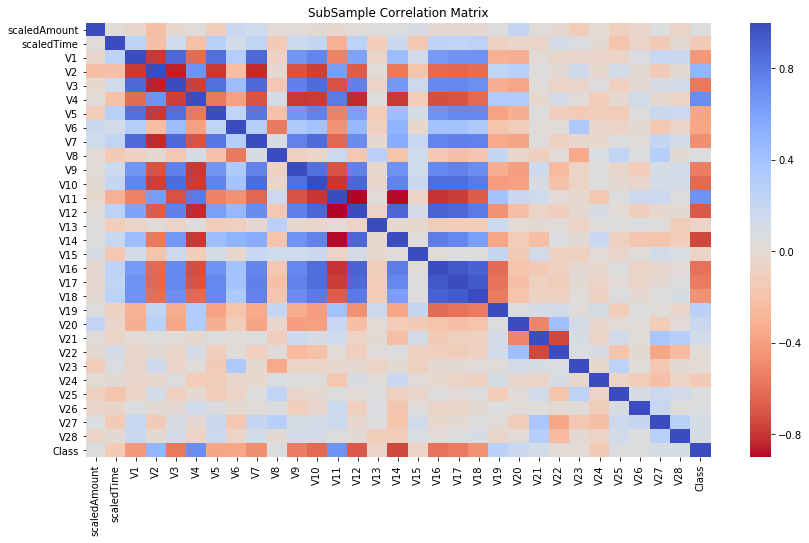

In [15]:
# Make sure we use the subsample in our correlation

f, (ax) = plt.subplots(1, figsize=(14,8))


sub_sample_corr = subsample_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix', fontsize=12)
plt.show()

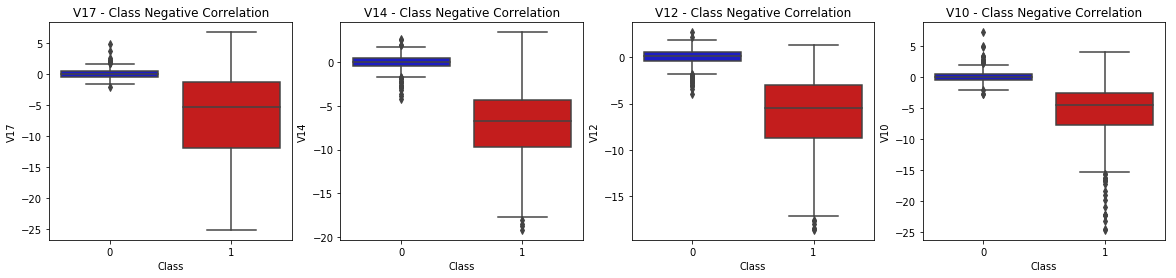

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=subsample_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 - Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=subsample_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 - Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=subsample_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 - Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=subsample_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 - Class Negative Correlation')

plt.show()

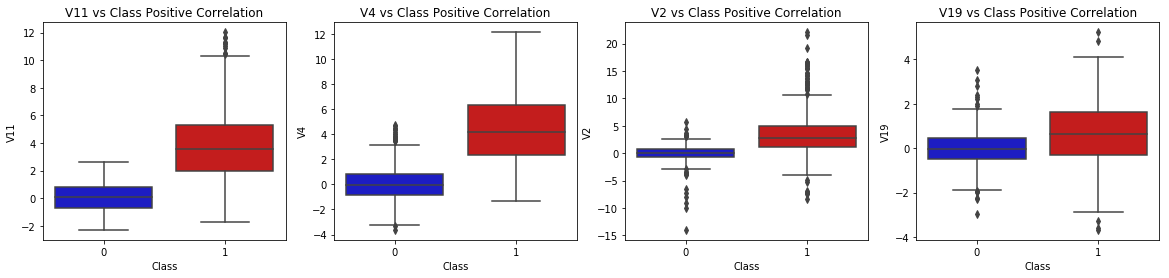

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=subsample_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=subsample_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=subsample_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=subsample_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

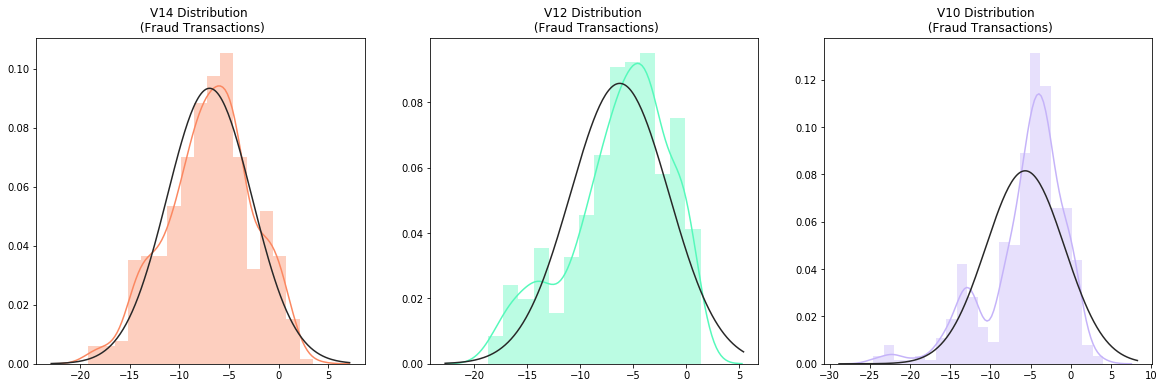

In [18]:
from scipy.stats import norm

f, axes = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = subsample_df['V14'].loc[subsample_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=axes[0], fit=norm, color='#FB8861')
axes[0].set_title('V14 Distribution \n (Fraud Transactions)', fontsize=12)

v12_fraud_dist = subsample_df['V12'].loc[subsample_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=axes[1], fit=norm, color='#56F9BB')
axes[1].set_title('V12 Distribution \n (Fraud Transactions)', fontsize=12)


v10_fraud_dist = subsample_df['V10'].loc[subsample_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=axes[2], fit=norm, color='#C5B3F9')
axes[2].set_title('V10 Distribution \n (Fraud Transactions)', fontsize=12)

plt.show()

In [19]:
# V14 removing Outliers 
v14_fraud = subsample_df['V14'].loc[subsample_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 lower: {}'.format(v14_lower))
print('V14 upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 Outliers for Fraud transactions: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

subsample_df = subsample_df.drop(subsample_df[(subsample_df['V14'] > v14_upper) | (subsample_df['V14'] < v14_lower)].index)
print("")

# V12 removing outliers from fraud transactions
v12_fraud = subsample_df['V12'].loc[subsample_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 lower: {}'.format(v12_lower))
print('V12 upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('V12 outliers for Fraud transactions: {}'.format(len(outliers)))
subsample_df = subsample_df.drop(subsample_df[(subsample_df['V12'] > v12_upper) | (subsample_df['V12'] < v12_lower)].index)
print('Number of instances after removing outliers: {}'.format(len(subsample_df)))
print("")


# V10 removing outliers 
v10_fraud = subsample_df['V10'].loc[subsample_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 lower: {}'.format(v10_lower))
print('V10 upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('V10 outliers for Fraud transactions: {}'.format(len(outliers)))
subsample_df = subsample_df.drop(subsample_df[(subsample_df['V10'] > v10_upper) | (subsample_df['V10'] < v10_lower)].index)
print('Number of instances after removing outliers: {}'.format(len(subsample_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 lower: -17.807576138200663
V14 upper: 3.8320323237414122
V14 Outliers for Fraud transactions: 4
V14 outliers:[-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.049997689859396]

V12 lower: -17.3430371579634
V12 upper: 5.776973384895937
V12 outliers: [-18.683714633344298, -18.047596570821604, -18.4311310279993, -18.553697009645802]
V12 outliers for Fraud transactions: 4
Number of instances after removing outliers: 976

V10 lower: -14.89885463232024
V10 upper: 4.920334958342141
V10 outliers: [-15.124162814494698, -15.2399619587112, -24.403184969972802, -22.1870885620007, -15.2399619587112, -16.2556117491401, -19.836148851696, -18.2711681738888, -22.1870885620007, -15.346098846877501, -17.141513641289198, -14.9246547735487, -22.1870885620007, -23.2282548357516, -16.3035376590131, -15.563791338730098, -15.1237521803455, -16.6011969664137, -22.1870885620007, -15

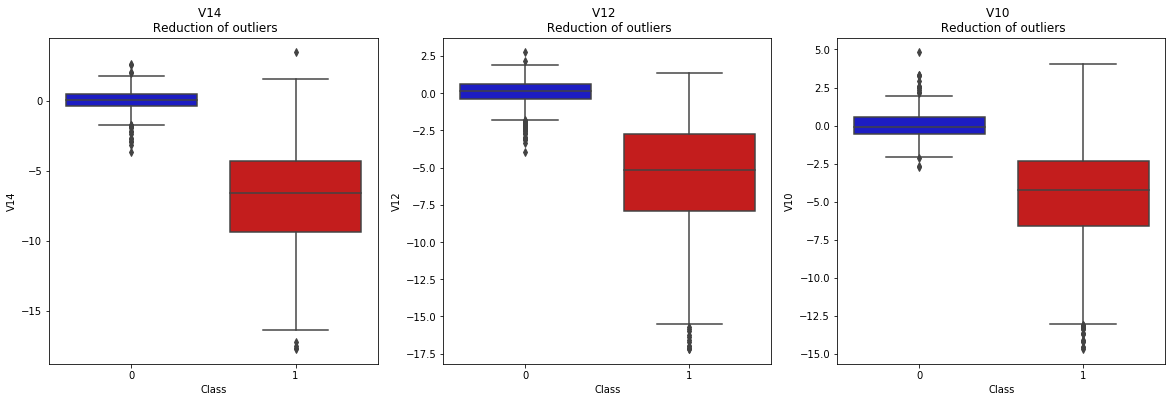

In [20]:
f, axes = plt.subplots(1, 3, figsize=(20,6))
colors = ["#0101DF", "#DF0101"]
# outliers removed
# V14
sns.boxplot(x="Class", y="V14", data=subsample_df,ax=axes[0], palette=colors)
axes[0].set_title("V14  \n Reduction of outliers", fontsize=12)

# V12
sns.boxplot(x="Class", y="V12", data=subsample_df, ax=axes[1], palette=colors)
axes[1].set_title("V12  \n Reduction of outliers", fontsize=12)


# V10
sns.boxplot(x="Class", y="V10", data=subsample_df, ax=axes[2], palette=colors)
axes[2].set_title("V10  \n Reduction of outliers", fontsize=12)



plt.show()

In [21]:
# Undersampling
X = subsample_df.drop('Class', axis=1)
y = subsample_df['Class']

In [22]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            grad = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * grad
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_probability(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_probability(X).round()


In [24]:

model = LogisticRegression(lr=0.1, num_iter=100000)

In [25]:
%time model.fit(X_train, y_train)

/Users/gokturkcagri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


CPU times: user 3min 38s, sys: 3.02 s, total: 3min 41s
Wall time: 1min 52s


In [34]:
predictions = model.predict(X_test)
(predictions == y_test).mean()

0.9473684210526315

In [43]:
k = 0
for i in range(0, predictions.shape[0]):
    if predictions[i] == y_test.values[i]:
        k = k + 1
accuracy = k/y_test.shape[0]


In [44]:
tp = fp = 0
for i in range(0, predictions.shape[0]):
    if predictions[i] == y_test.values[i] == 1:
        tp = tp + 1
    elif predictions[i] == 1 and y_test.values[i] == 0:
        fp = fp + 1

precision = tp/(tp + fp)

In [45]:
fn = 0
for i in range(0, predictions.shape[0]):
    if predictions[i] == 0 and y_test.values[i] == 1:
        fn = fn + 1
recall = tp/(tp + fn)

In [46]:
f1_score = (2 * precision * recall)/(precision + recall)

In [47]:
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1 score: ",f1_score)

accuracy:  0.9473684210526315
precision:  0.9431818181818182
recall:  0.9431818181818182
f1 score:  0.9431818181818182


In [48]:
tn = 0
for i in range(0, predictions.shape[0]):
    if predictions[i] == y_test.values[i] == 0:
        tn = tn + 1
        
cm = np.array([[tp, fn], [fp, tn]])
print(cm)

[[83  5]
 [ 5 97]]


Confusion matrix without normalization


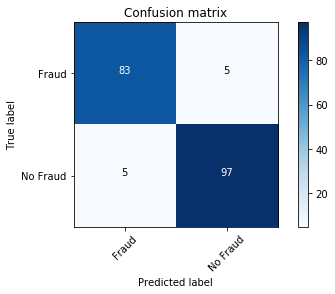

<Figure size 432x288 with 0 Axes>

In [49]:
#print confusion matrix
%matplotlib inline
import itertools
classes = ["Fraud","No Fraud"]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print('Confusion matrix without normalization')
    
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure()
plot_confusion_matrix(cm, classes)

